# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TribThapa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

print(f"News API Key type: {type(news_api_key)}")

News API Key type: <class 'str'>


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

newsapi

In [5]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin",
                                  language='en')

In [6]:
# Quick summary of BTC news
print(f"Here is an example of BTC news: \n"
      f"\n"
      f"{btc_news['articles'][0]}")
print()
print(f"The total number of articles received is {btc_news['totalResults']}")

Here is an example of BTC news: 

{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Khari Johnson', 'title': 'Why Not Use Self-Driving Cars as Supercomputers?', 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.', 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/', 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg', 'publishedAt': '2021-07-19T11:00:00Z', 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

The total number of articles received is 7748


In [7]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum",
                                  language="en")

In [8]:
# Quick summary of ETH news
print(f"Here is an example of ETH news: \n"
      f"\n"
      f"{eth_news['articles'][0]}")
print()
print(f"The total number of articles received is {eth_news['totalResults']}")

Here is an example of ETH news: 

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'}, 'author': 'Connie Loizos', 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’', 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…', 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/', 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667', 'publishedAt': '2021-07-16T16:00:55Z', 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 c

In [9]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

# Get sentiment and append to list
for article in btc_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        
        btc_sentiments.append({"text": text,
                               "compound": compound,
                               "positive": positive,
                               "negative": negative,
                               "neutral": neutral})
    except AttributError:
        pass

# Create sentiment dataframe
btc_sentiments_df = pd.DataFrame(btc_sentiments)

# Show results
print("Below is what the BTC sentiments table looks like:")
print()
display(btc_sentiments_df.head())
print()
print("Below is the description of the BTC sentiments table:")
print()
print(btc_sentiments_df.describe())

Below is what the BTC sentiments table looks like:



,text,compound,positive,negative,neutral
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836



Below is the description of the BTC sentiments table:

        compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.014545   0.055900   0.051300   0.892800
std     0.471377   0.060072   0.091597   0.107686
min    -0.827100   0.000000   0.000000   0.653000
25%    -0.119175   0.000000   0.000000   0.836000
50%     0.000000   0.048500   0.000000   0.910500
75%     0.315000   0.092500   0.078250   1.000000
max     0.726400   0.178000   0.287000   1.000000


In [10]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

# Get sentiment and append to list
for article in eth_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        
        eth_sentiments.append({"text": text,
                               "compound": compound,
                               "positive": positive,
                               "negative": negative,
                               "neutral": neutral})
    except AttributError:
        pass

# Create sentiment dataframe
eth_sentiments_df = pd.DataFrame(eth_sentiments)

# Show results
print("Below is what the ETH sentiments table looks like:")
print()
display(eth_sentiments_df.head())
print()
print("Below is the description of the ETH sentiments table:")
print()
print(eth_sentiments_df.describe())

Below is what the ETH sentiments table looks like:



,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895
4,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849



Below is the description of the ETH sentiments table:

        compound   positive   negative    neutral
count  20.000000  20.000000  20.000000  20.000000
mean    0.247720   0.073250   0.015500   0.911250
std     0.326828   0.073203   0.028127   0.078638
min    -0.340000   0.000000   0.000000   0.782000
25%     0.000000   0.000000   0.000000   0.842750
50%     0.295000   0.077500   0.000000   0.922500
75%     0.528675   0.149250   0.010250   1.000000
max     0.771700   0.194000   0.072000   1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH has a greater mean positive score (0.073250) when compared to BTC (0.055900).

<br/><br/>

Q: Which coin had the highest compound score?

A: ETH has a higher compound score of 0.771700 when compared to BTC (0.726400). The compound score is the sum of positive, negative & neutral scores which is then normalized between -1 (most extreme negative) and +1 (most extreme positive).

The closer the Compound score is to +1, the higher the positivity of the text.

<br/><br/>

Q. Which coin had the highest positive score?

A: ETH has the highest positive score of 0.194000 when compared to BTC (0.178000).

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = ["the", "will", "of", "with"]

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words_tokenized = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words_tokenized]
   
    # Convert the words to lowercase
    words_lowercase = [word.lower() for word in lem]
    
    # Remove the stop words
    words_str = ' '.join(words_lowercase)
            
    tokens = [word for word in words_lowercase if word not in sw.union(sw_addons)]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
btc_text = str(list(btc_sentiments_df['text']))

btc_tokens = tokenizer(btc_text)

print(f"Here is an example of BTC word tokens: {btc_tokens[:10]}")
print()
print(f"The total number of BTC word tokens are: {len(btc_tokens)}")

Here is an example of BTC word tokens: ['like', 'dogecoin', 'devotee', 'mayor', 'reno', 'leader', 'el', 'salvador', 'aldo', 'baoicchi']

The total number of BTC word tokens are: 386


In [15]:
# Create a new tokens column for Ethereum
eth_text = str(list(eth_sentiments_df['text']))

eth_tokens = tokenizer(eth_text)

print(f"Here is an example of ETH word tokens: {eth_tokens[:10]}")
print()
print(f"The total number of ETH word tokens are: {len(eth_tokens)}")

Here is an example of ETH word tokens: ['many', 'blockchain', 'platform', 'competing', 'investor', 'developer', 'attention', 'right', 'big', 'daddy']

The total number of ETH word tokens are: 379


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Bitcoin Counter
btc_word_count = Counter(btc_tokens)

print(f"Here's the word count: \n"
      f"\n"
      f"{dict(btc_word_count)}")
print()
print(f"Here's the most commont: {dict(btc_word_count.most_common(10))}")

Here's the word count: 

{'like': 2, 'dogecoin': 2, 'devotee': 1, 'mayor': 1, 'reno': 1, 'leader': 1, 'el': 1, 'salvador': 1, 'aldo': 1, 'baoicchi': 1, 'convinced': 1, 'cryptocurrency': 3, 'future': 1, 'ceo': 1, 'founder': 1, 'canadian': 1, 'scooter': 1, 'maker': 2, 'daymak': 1, 'belief': 1, 'char': 20, 'filed': 1, 'underrnthe': 1, 'supply': 1, 'chain': 1, 'attack': 7, 'ha': 4, 'reached': 1, 'thousand': 1, 'organizationsrnillustration': 1, 'alex': 1, 'castro': 1, 'vergernthree': 1, 'day': 2, 'ransomware': 4, 'attacker': 1, 'started': 1, 'holiday': 1, 'weekend': 1, 'comprom': 1, 'image': 2, 'copyrightgetty': 1, 'imagesrnthe': 1, 'gang': 2, 'behind': 1, 'colossal': 1, 'demanded': 2, 'paid': 1, 'bitcoin': 14, 'return': 1, 'universal': 1, 'decryptor': 1, 'say': 1, 'unlock': 1, 'file': 1, 'get': 3, 'roundup': 1, 'techcrunchs': 1, 'biggest': 1, 'important': 1, 'story': 1, 'delivered': 1, 'inbox': 1, 'every': 1, 'pm': 1, 'pdt': 1, 'subscribe': 1, 'herernhello': 1, 'welcome': 1, 'daily': 1, 'c

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams(btc_tokens,n=2))

print(f"Here BTC bigrams: \n"
      f"\n"
      f"{dict(btc_bigrams)}")

Here BTC bigrams: 

{('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'char'): 1, ('char', 'filed'): 1, ('filed', 'underrnthe'): 1, ('underrnthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsrnillustration'): 1, ('organizationsrnillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergernthree'): 1, ('vergernthree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('starte

In [19]:
# Ethereum Counter
eth_word_count = Counter(eth_tokens)

print(f"Here's the word count: \n"
      f"\n"
      f"{dict(eth_word_count)}")
print()
print(f"Here's the most commont: {dict(eth_word_count.most_common(10))}")

Here's the word count: 

{'many': 1, 'blockchain': 4, 'platform': 2, 'competing': 1, 'investor': 3, 'developer': 2, 'attention': 1, 'right': 1, 'big': 1, 'daddy': 1, 'ethereum': 13, 'socalled': 2, 'killers': 1, 'like': 3, 'solana': 1, 'wrote': 1, 'char': 20, 'infrastructure': 1, 'startup': 1, 'heating': 1, 'industry': 2, 'fervor': 1, 'brings': 1, 'user': 2, 'space': 1, 'still': 2, 'feel': 1, 'extremely': 1, 'young': 1, 'despite': 1, 'heavy': 1, 'institutional': 2, 'embrace': 1, 'crypto': 3, 'retail': 1, 'grew': 1, 'comfortable': 1, 'buying': 1, 'cryptocurrencies': 3, 'bitcoin': 8, 'decentralized': 2, 'application': 1, 'world': 4, 'ha': 4, 'lot': 1, 'work': 2, 'come': 1, 'onboarding': 1, 'spiked': 1, 'monday': 2, 'amazon': 1, 'listed': 1, 'open': 2, 'job': 1, 'digital': 1, 'currency': 2, 'product': 2, 'leadxarnamazon': 1, 'known': 1, 'plummeting': 1, 'stock': 2, 'wouldbe': 1, 'rival': 1, 'whenever': 1, 'rumor': 1, 'swirl': 1, 'ethereumrnyuriko': 1, 'nakaornether': 1, 'overtook': 1, 'num

In [20]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams(eth_tokens,n=2))

print(f"Here ETH bigrams: \n"
      f"\n"
      f"{dict(eth_bigrams)}")

Here ETH bigrams: 

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'char'): 1, ('char', 'blockchain'): 1, ('blockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypt

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10_token_count = token_count(btc_tokens)

print(f"Here are the top 10 words for BTC: \n"
      f" \n"
      f"{dict(btc_top10_token_count)}")

Here are the top 10 words for BTC: 
 
{'char': 20, 'bitcoin': 14, 'attack': 7, 'reuters': 7, 'illustration': 7, 'reutersdado': 7, 'seen': 6, 'taken': 6, 'virtual': 5, 'currency': 5}


In [23]:
# Use token_count to get the top 10 words for Ethereum
eth_top10_token_count = token_count(eth_tokens)

print(f"Here are the top 10 words for ETH: \n"
      f" \n"
      f"{dict(eth_top10_token_count)}")

Here are the top 10 words for ETH: 
 
{'char': 20, 'ethereum': 13, 'bitcoin': 8, 'cryptocurrency': 8, 'network': 6, 'blockchain': 4, 'world': 4, 'ha': 4, 'investor': 3, 'like': 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [25]:
btc_token_str = ' '.join(btc_tokens)
btc_token_str

'like dogecoin devotee mayor reno leader el salvador aldo baoicchi convinced cryptocurrency future ceo founder canadian scooter maker daymak belief char filed underrnthe supply chain attack ha reached thousand organizationsrnillustration alex castro vergernthree day ransomware attacker started holiday weekend comprom char image copyrightgetty imagesrnthe gang behind colossal ransomware attack ha demanded paid bitcoin return universal decryptor say unlock file char get roundup techcrunchs biggest important story delivered inbox every day pm pdt subscribe herernhello welcome daily crunch july char retail investor grew comfortable buying cryptocurrencies like bitcoin ethereum decentralized application world still ha lot work come onboarding char longtime techcrunch reader know well michael arrington cofounded techcrunch crunchbase well venture fund crunchfund wa later renamed tuesday capital arringto char singapore july reuters bitcoin broke wednesday headed another attempt breaking month

Text(0.5, 1.0, 'Bitcoin Word Cloud')

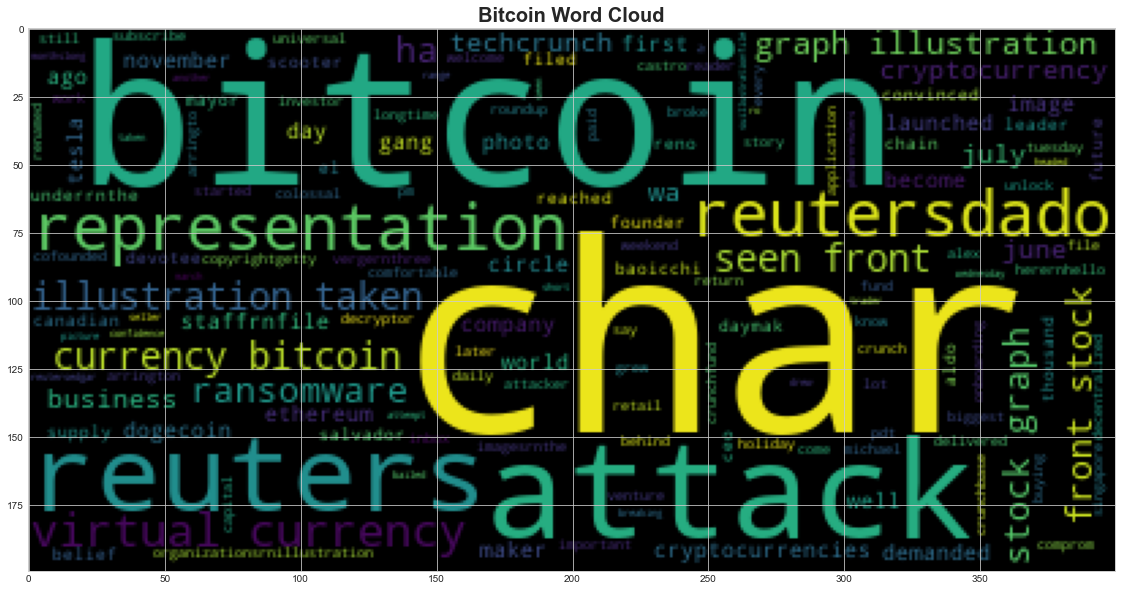

In [26]:
# Generate the Bitcoin word cloud
btc_token_str = ' '.join(btc_tokens)

btc_wc = WordCloud().generate(btc_token_str)

plt.imshow(btc_wc)
plt.title("Bitcoin Word Cloud", fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Ethereum Word Cloud')

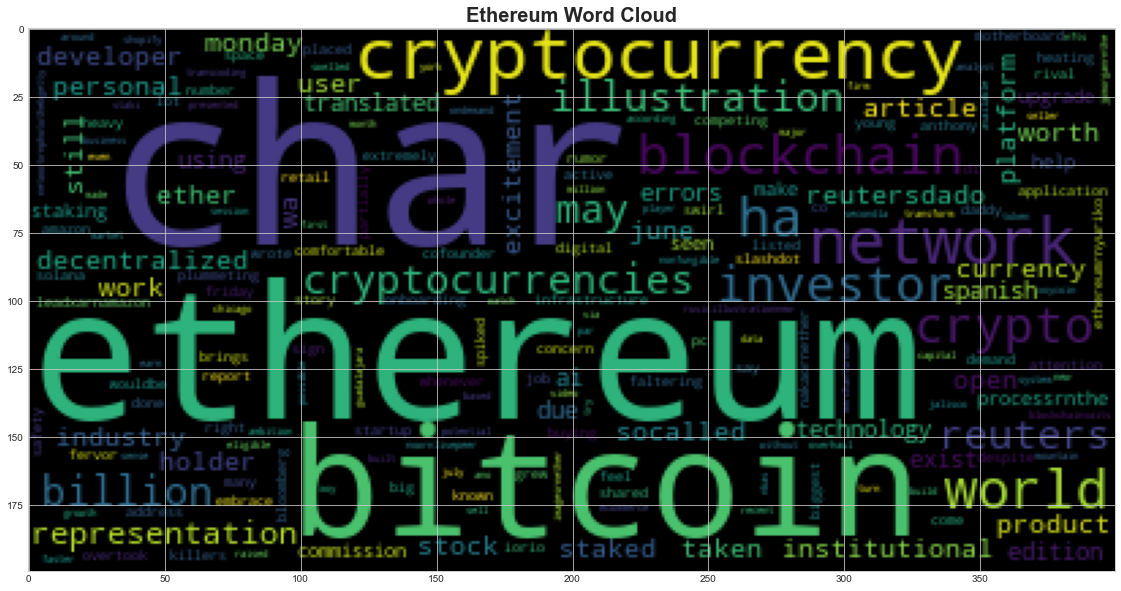

In [27]:
# Generate the Ethereum word cloud
eth_token_str = ' '.join(eth_tokens)

etc_wc = WordCloud().generate(eth_token_str)

plt.imshow(etc_wc)
plt.title("Ethereum Word Cloud", fontsize=20, fontweight='bold')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [39]:
# Concatenate all of the Bitcoin text together
btc_text

'[\'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]\', \'Filed under:\\r\\nThe supply chain attack has reached over a thousand organizations.\\r\\nIllustration by Alex Castro / The Verge\\r\\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]\', \'image copyrightGetty Images\\r\\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]\', \'To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\\r\\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]\', \'While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum i

In [45]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "BTC Named Entity Recognition (NER) document"

In [46]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [59]:
# List all Entities
print(f"These are BTC entities: \n"
      f"\n"
      f"{eth_ner.ents}")

These are BTC entities: 

(Ethereum, Ethereum Killers, Solana, Bitcoin and Ethereum, 2021, Monday, Amazon, Friday, Anthony Di Iorio, Ethereum, Bloomberg, Slashdot, Ethereum, June 29, 2021, REUTERS, Dado Ruvic, July 30, Reuters, second, more than $13 billion, 2.0, Getty, more than $13 billion, 2.0, $20 million, Ethereum, Spanish, AI, Xoy Capital, Guadalajara, Jalisco, Xoycoin, $40 billion, 2025, recent months, Monday, Chicago Bulls, American Express, Spanish, AI, this process.\r\nThe Securities and Exchange Commission, London, Ethereum, 12 965 000, August 3-5, Reuters, June 7, 2021, REUTERS, Edgar Su/Illustration/File, +304, Hackaday, Proof of Work, Bitcoin, Ethereum, May 19, 2021, REUTERS, Dado Ruvic, Reuters, 5.17%, 33)


---

### Ethereum NER

In [47]:
# Concatenate all of the Ethereum text together
eth_text

'[\'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]\', \'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]\', \'While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]\', \'Cryptocurrencies spiked Monday after Amazon listed an open job for a digital currency and blockchain product lead.\\xa0\\r\\nAmazon is known for plummeting the stocks of would-be rivals whenever rumors swirl… [+1425 chars]\', "Bitcoin and Ethereum\\r\\nYuriko Nakao\\r\\nEther overtook bitcoin in the number of active addresses on its n

In [49]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "ETH Named Entity Recognition (NER) document"

In [50]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [57]:
# List all Entities
print(f"These are ETH entities: \n"
      f"\n"
      f"{eth_ner.ents}")

These are ETH entities: 

(Ethereum, Ethereum Killers, Solana, Bitcoin and Ethereum, 2021, Monday, Amazon, Friday, Anthony Di Iorio, Ethereum, Bloomberg, Slashdot, Ethereum, June 29, 2021, REUTERS, Dado Ruvic, July 30, Reuters, second, more than $13 billion, 2.0, Getty, more than $13 billion, 2.0, $20 million, Ethereum, Spanish, AI, Xoy Capital, Guadalajara, Jalisco, Xoycoin, $40 billion, 2025, recent months, Monday, Chicago Bulls, American Express, Spanish, AI, this process.\r\nThe Securities and Exchange Commission, London, Ethereum, 12 965 000, August 3-5, Reuters, June 7, 2021, REUTERS, Edgar Su/Illustration/File, +304, Hackaday, Proof of Work, Bitcoin, Ethereum, May 19, 2021, REUTERS, Dado Ruvic, Reuters, 5.17%, 33)


---